In [18]:
import ssl
import pandas as pd
import numpy as np
from sklearn import set_config
from sklearn.pipeline import make_pipeline, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

set_config(transform_output = "pandas")

ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://raw.githubusercontent.com/ElieLECAS/ML_avance/fil_rouge/activite_finale/data/census.csv')
df.drop(['fnlwgt', 'education_num'], axis=1, inplace=True)
display(df.head(5))

age         workclass  education      marital_status         occupation  \
0   39         State-gov  Bachelors       Never-married       Adm-clerical   
1   50  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2   38           Private    HS-grad            Divorced  Handlers-cleaners   
3   53           Private       11th  Married-civ-spouse  Handlers-cleaners   
4   28           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    relationship   race     sex  capital_gain  capital_loss  hours_per_week  \
0  Not-in-family  White    Male        2174.0           0.0            40.0   
1        Husband  White    Male           0.0           0.0            13.0   
2  Not-in-family  White    Male           0.0           0.0            40.0   
3        Husband  Black    Male           0.0           0.0            40.0   
4           Wife  Black  Female           0.0           0.0            40.0   

  native_country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K

In [19]:
print(f'nb dupe {df.loc[df.duplicated()].shape[0]}')
df = df.drop_duplicates(ignore_index=True)
df.describe()

nb dupe 4487


age  capital_gain  capital_loss  hours_per_week
count  44355.000000  44355.000000  44355.000000    44355.000000
mean      39.242025   1180.267501     95.881096       40.590553
std       13.755937   7781.242634    420.914966       12.725503
min       17.000000      0.000000      0.000000        1.000000
25%       28.000000      0.000000      0.000000       40.000000
50%       38.000000      0.000000      0.000000       40.000000
75%       48.000000      0.000000      0.000000       45.000000
max       90.000000  99999.000000   4356.000000       99.000000

# Analyse
[SweetViz](https://github.com/fbdesignpro/sweetviz)

## tout le jeu de données

                                             |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



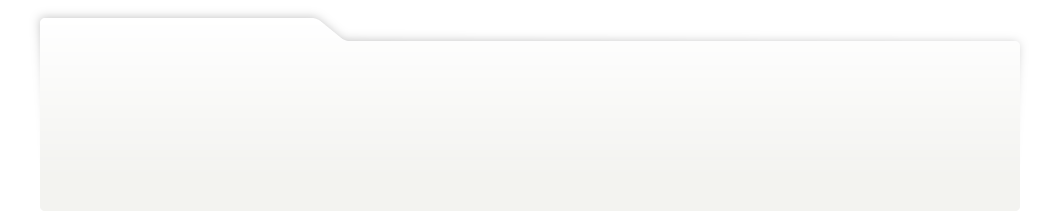
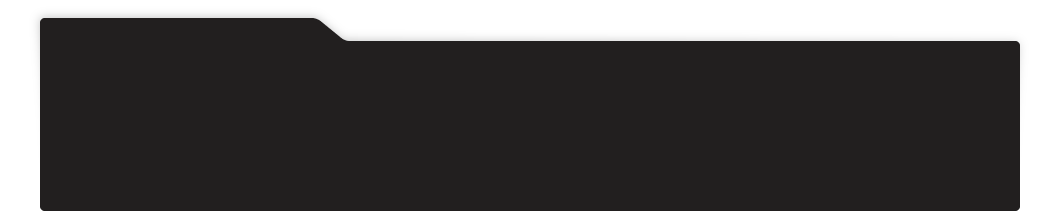
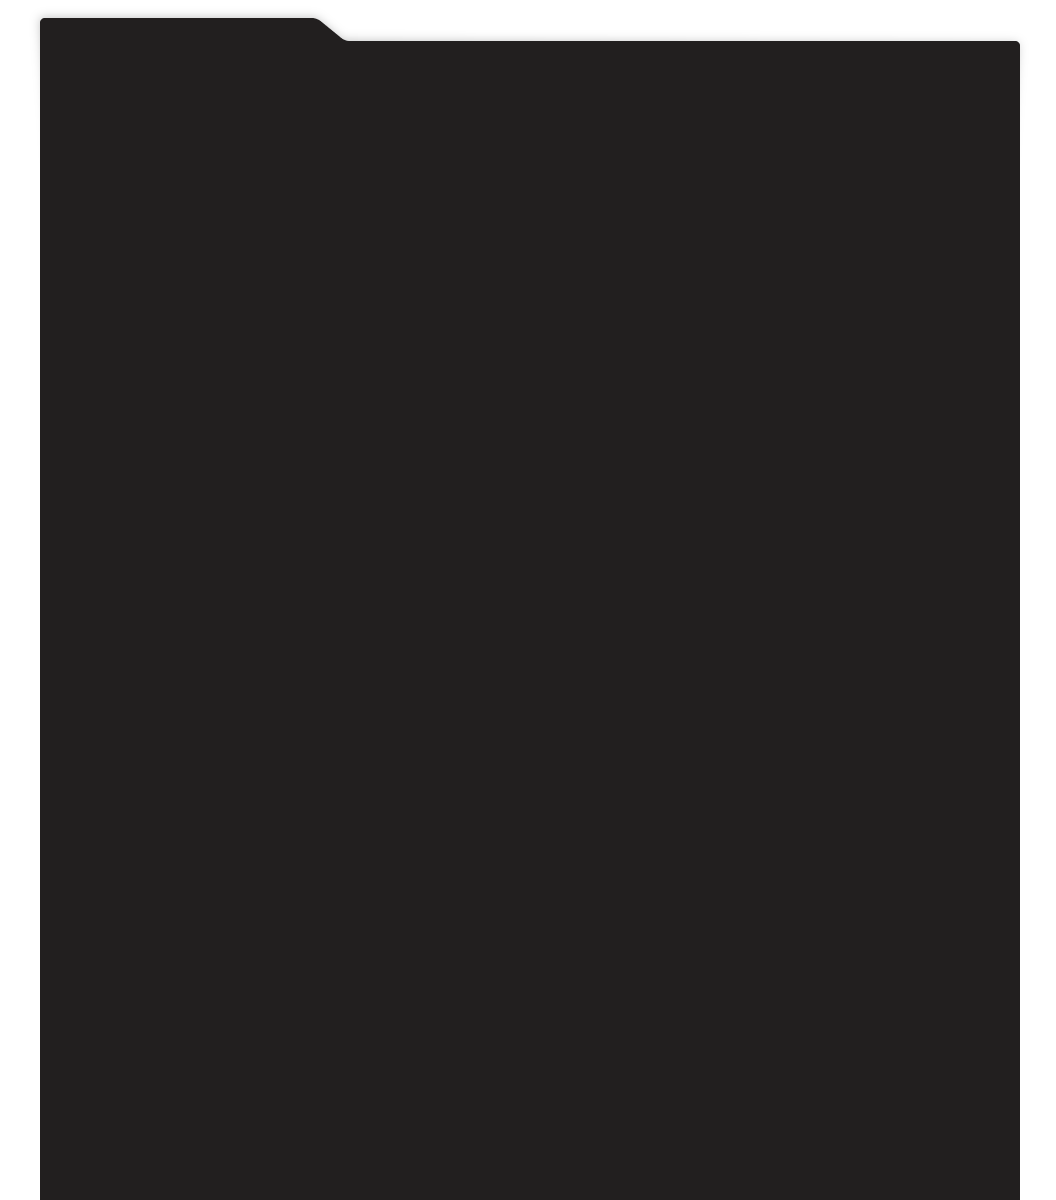
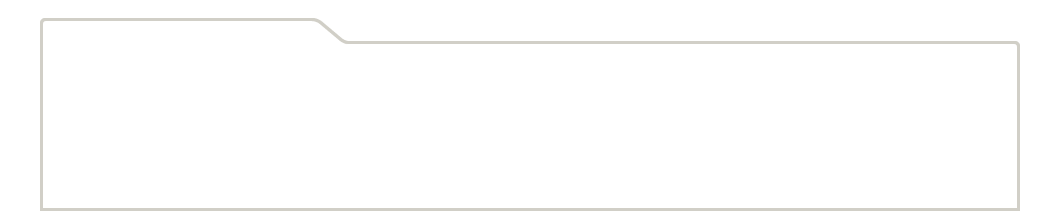
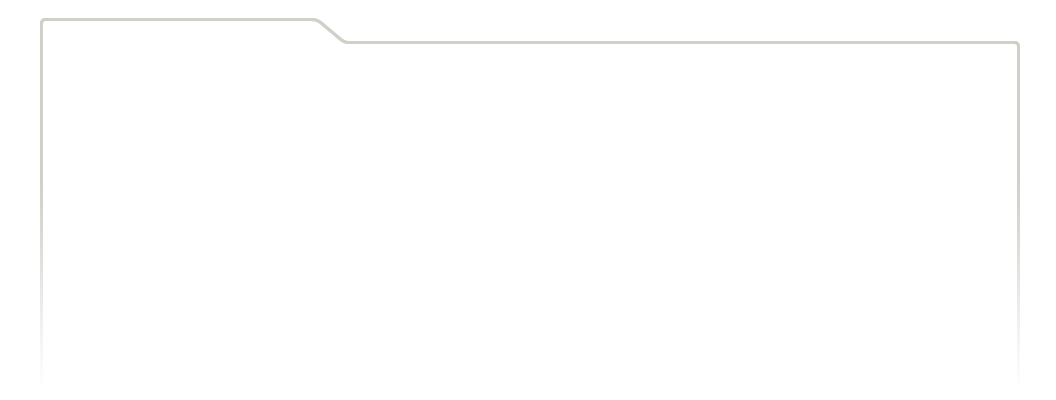
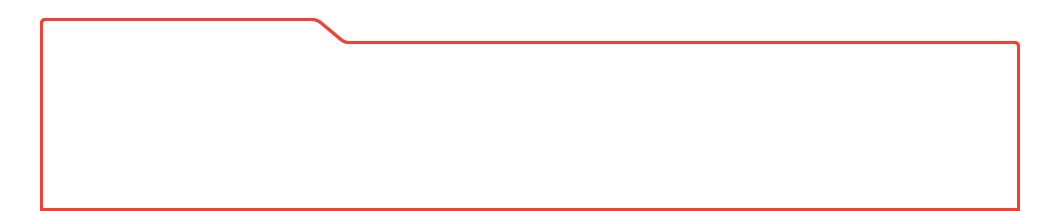
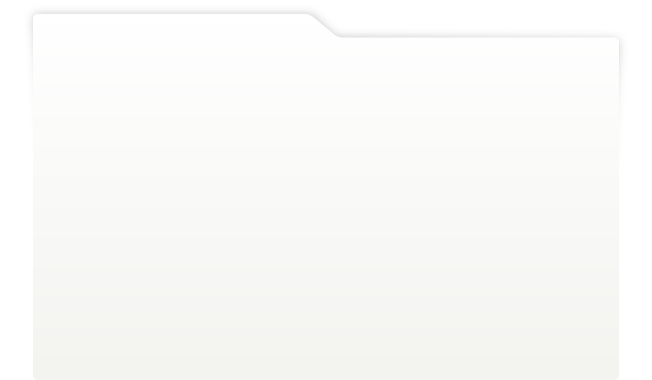
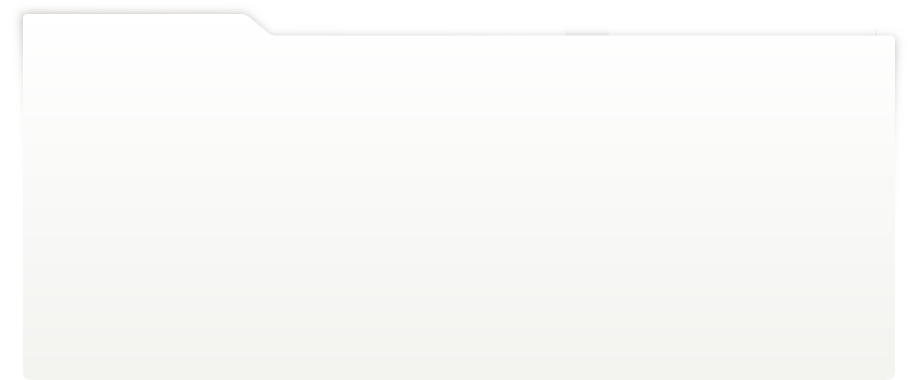
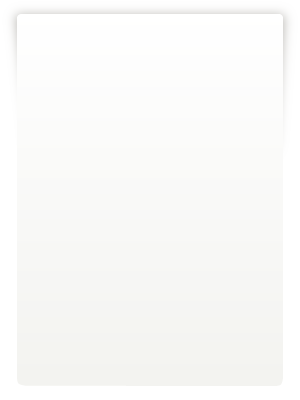
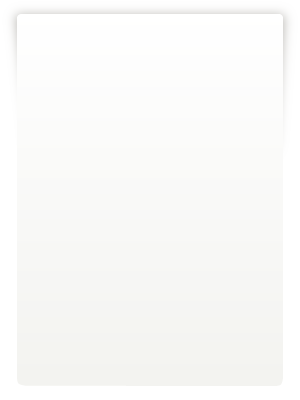
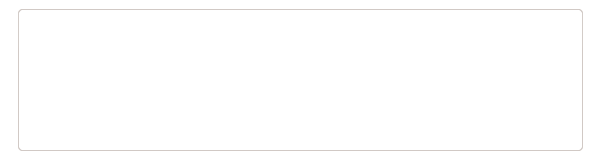
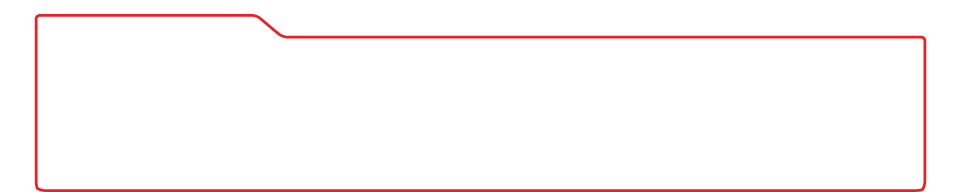
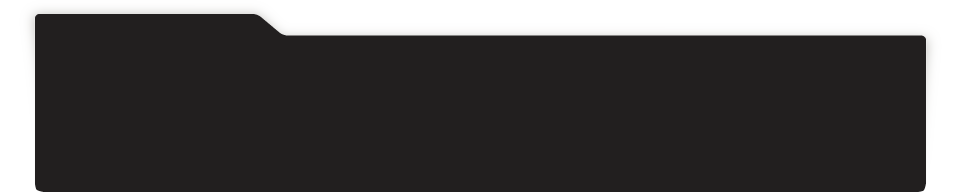
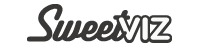
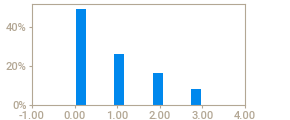
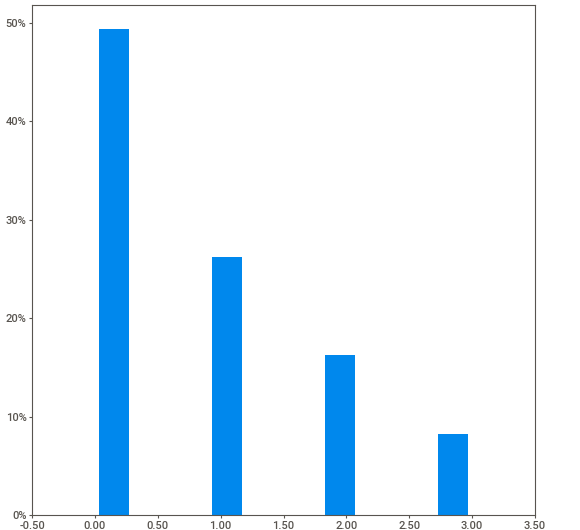
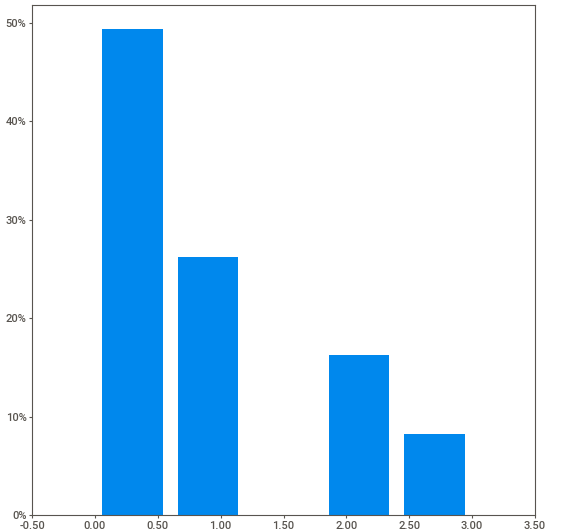
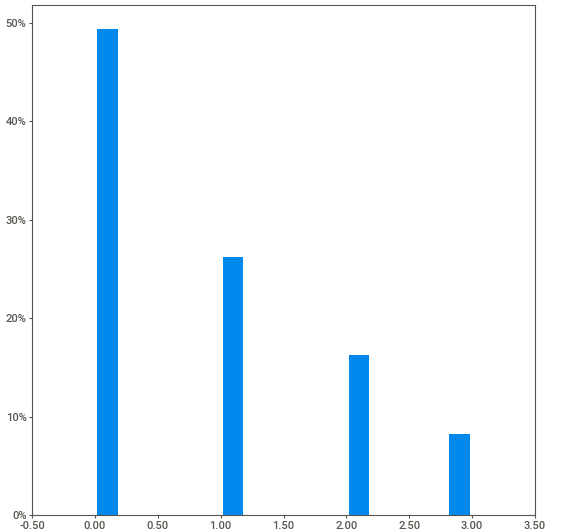
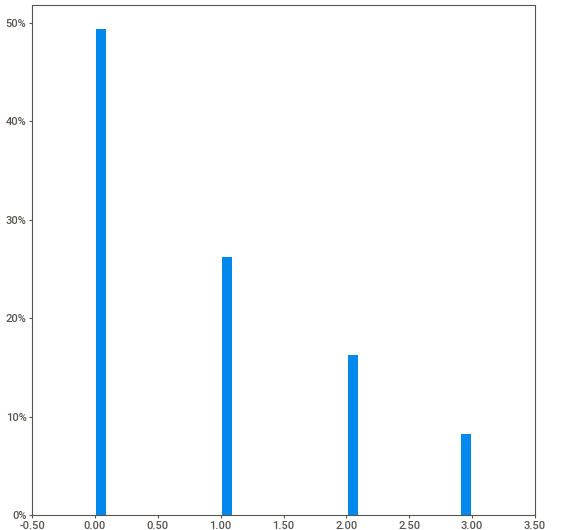
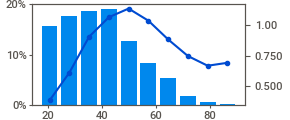
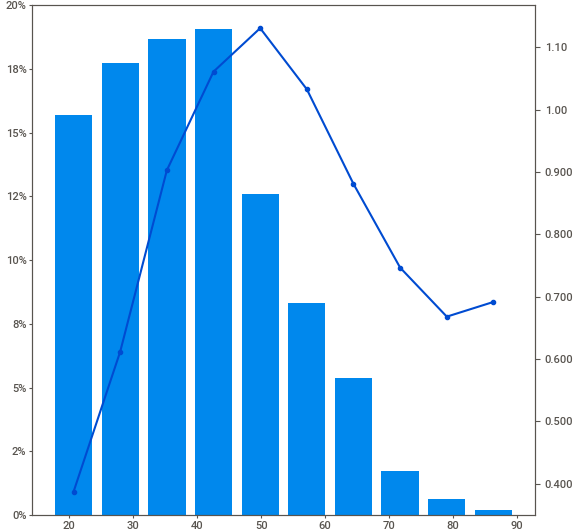
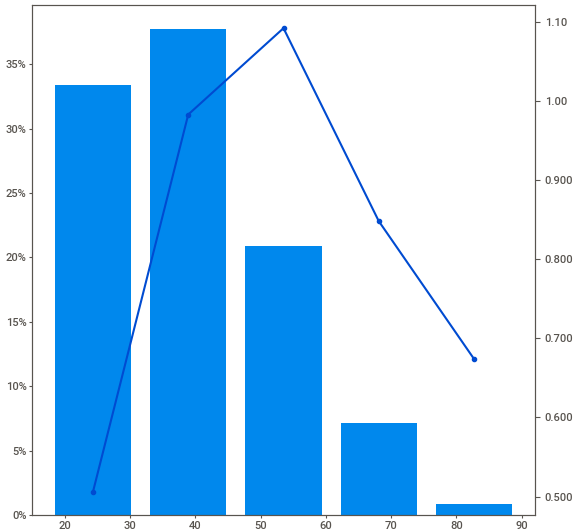
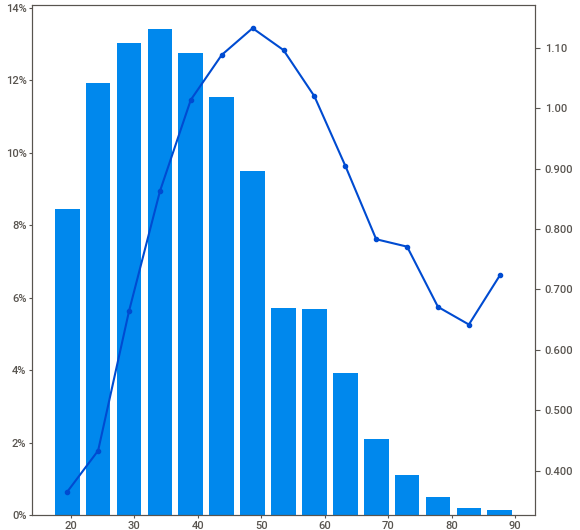
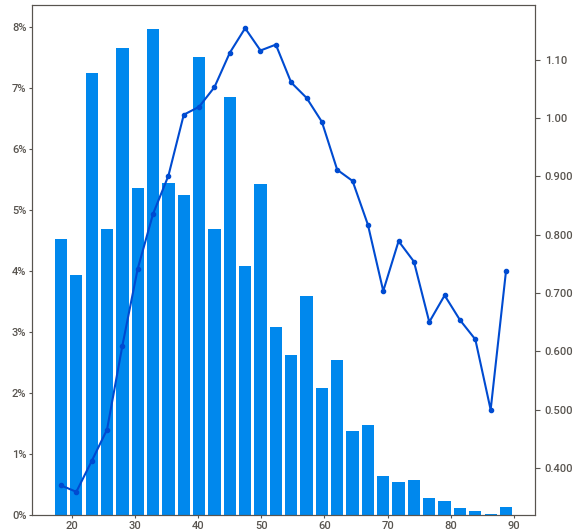
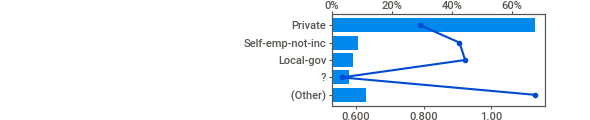
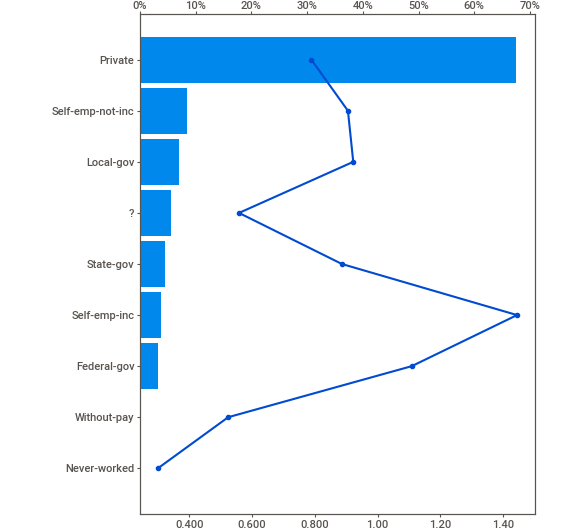
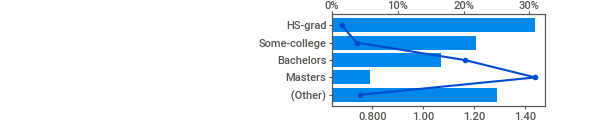
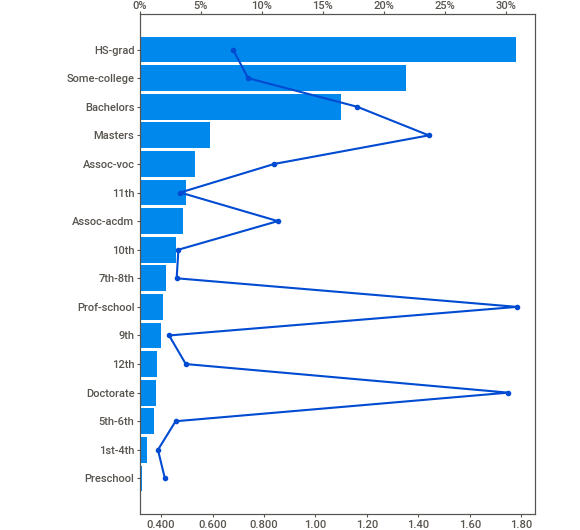
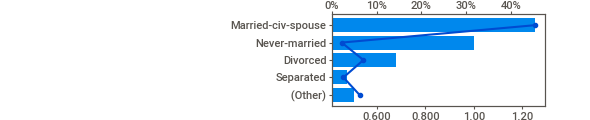
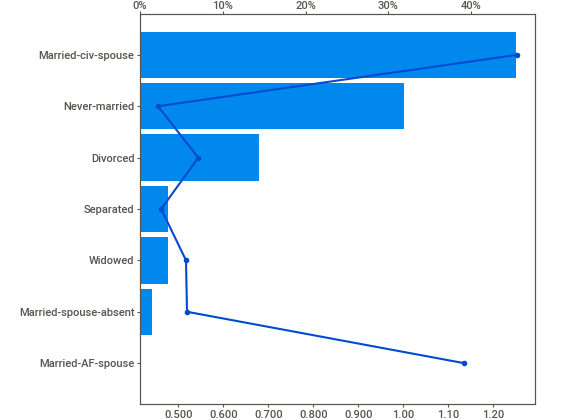
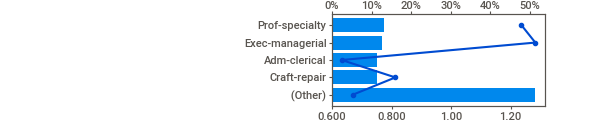
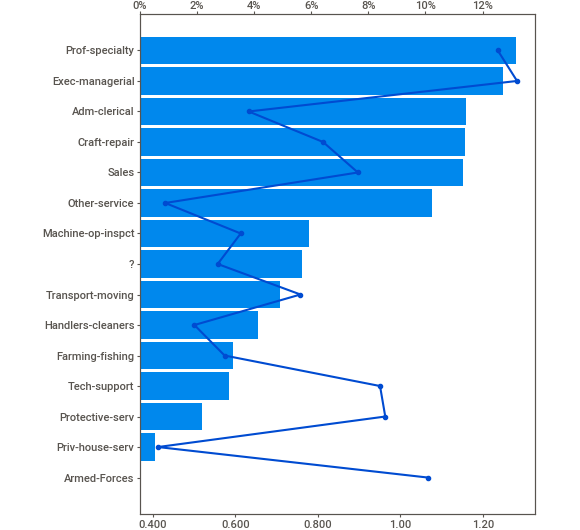
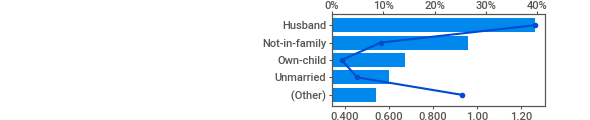
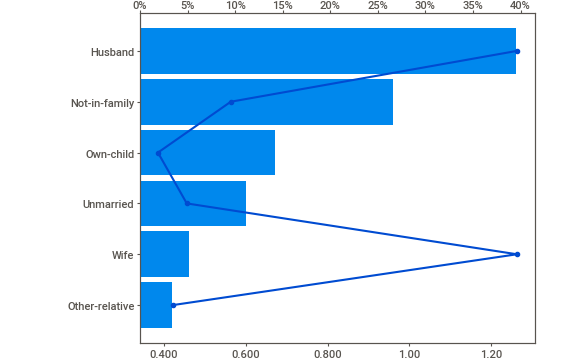
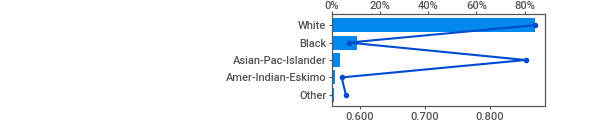
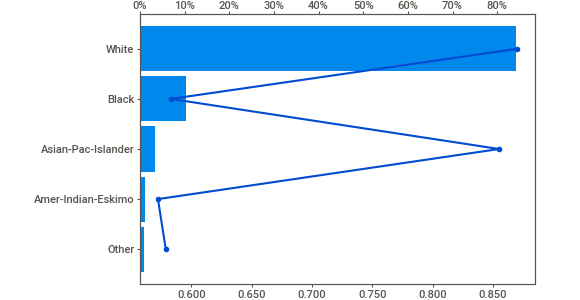
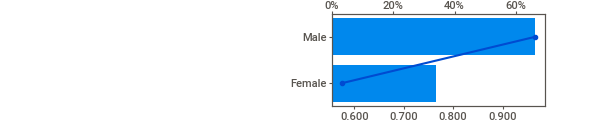
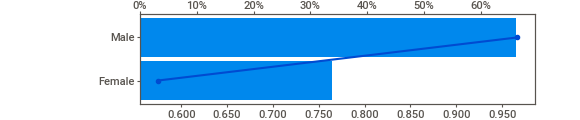
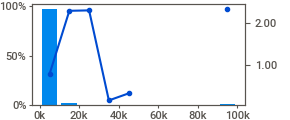
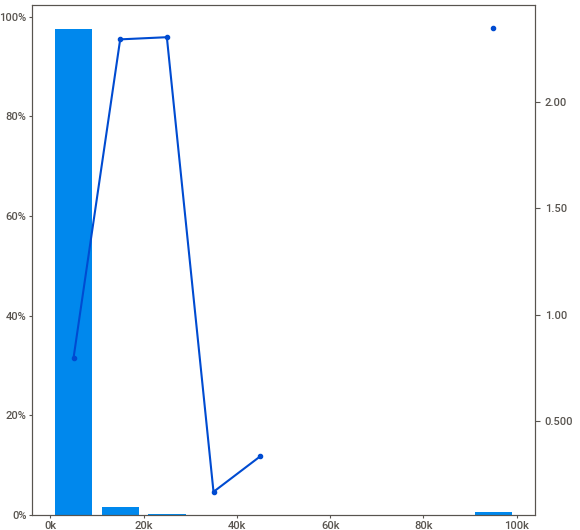
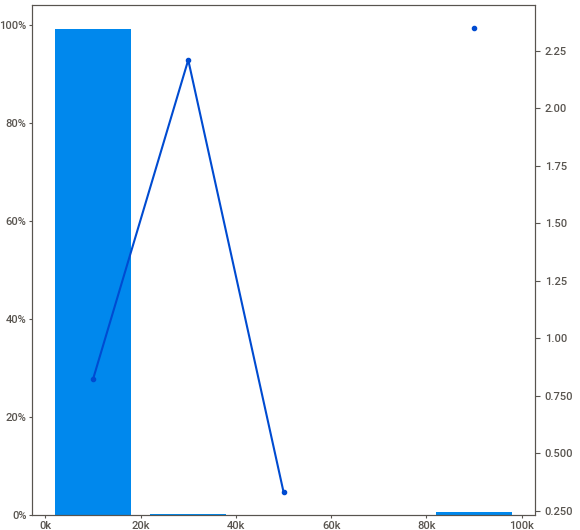
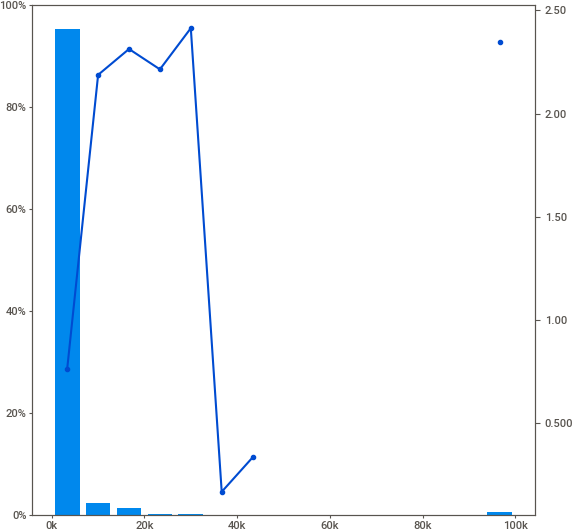
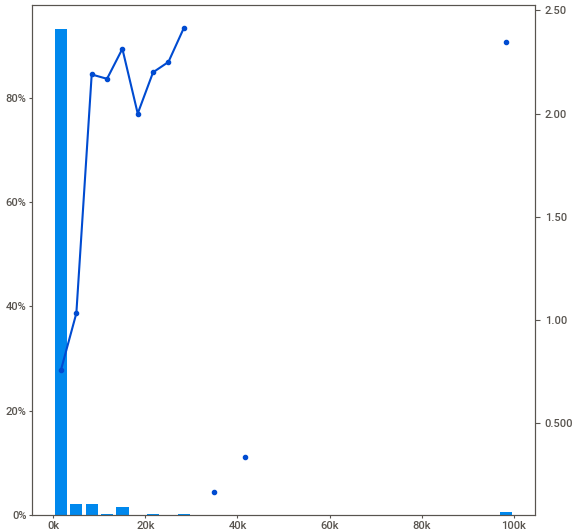
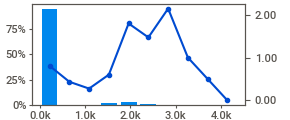
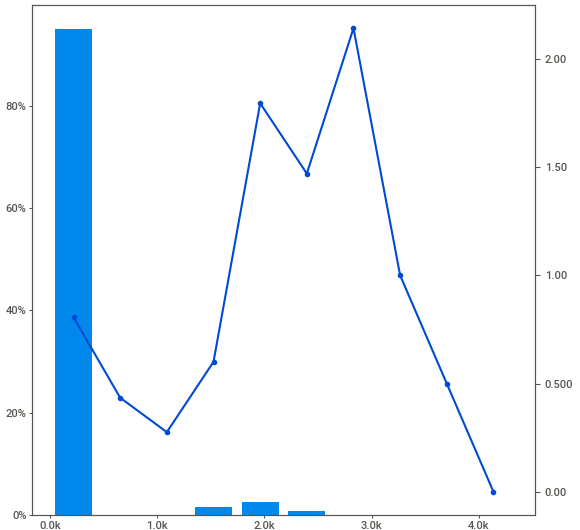
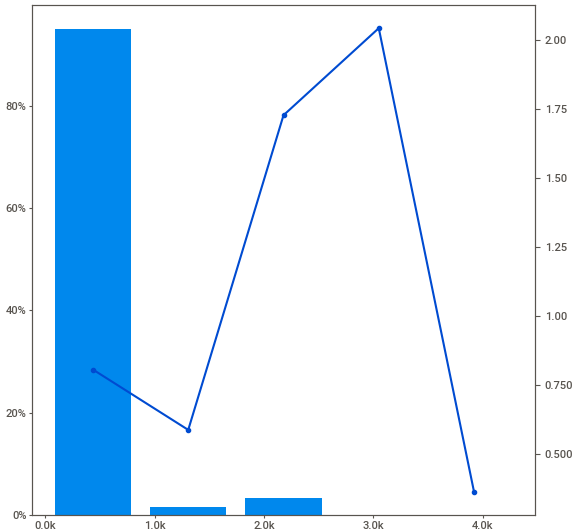
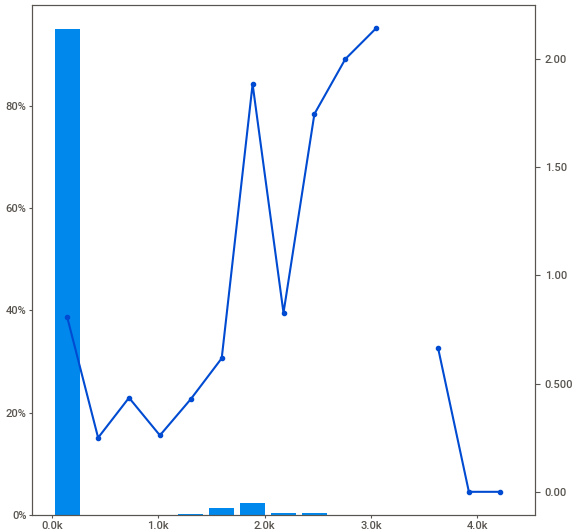
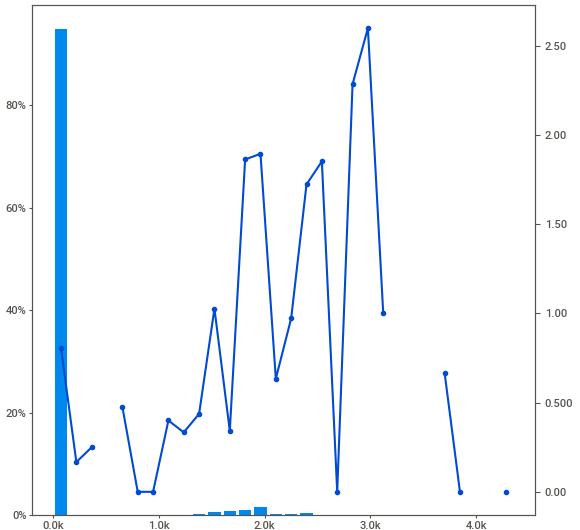
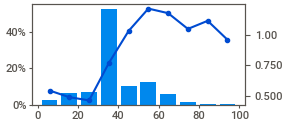
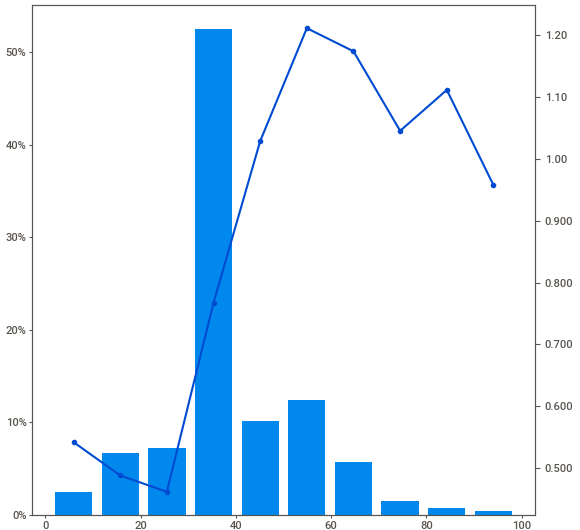
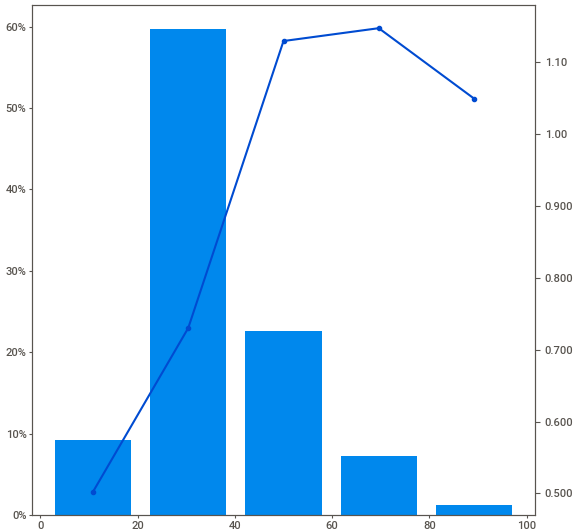
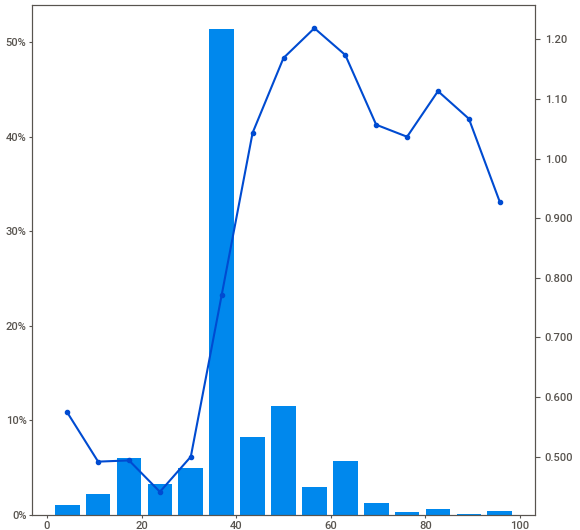
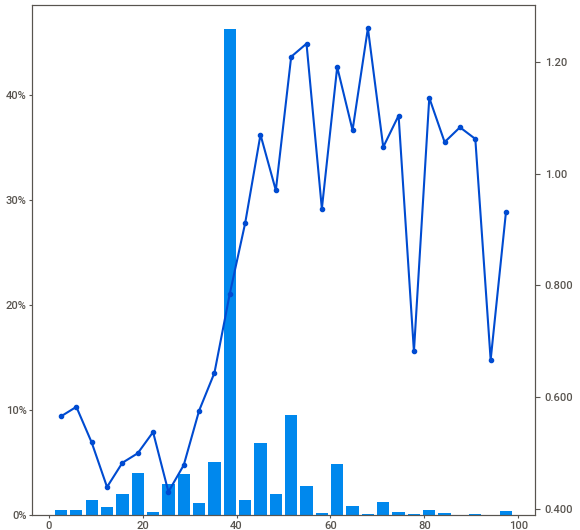
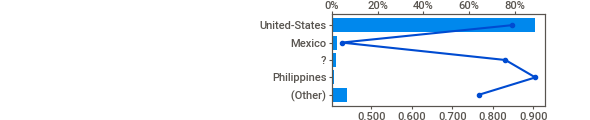
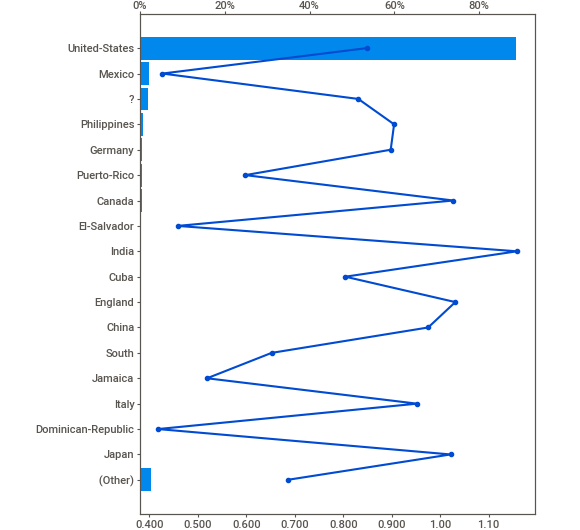
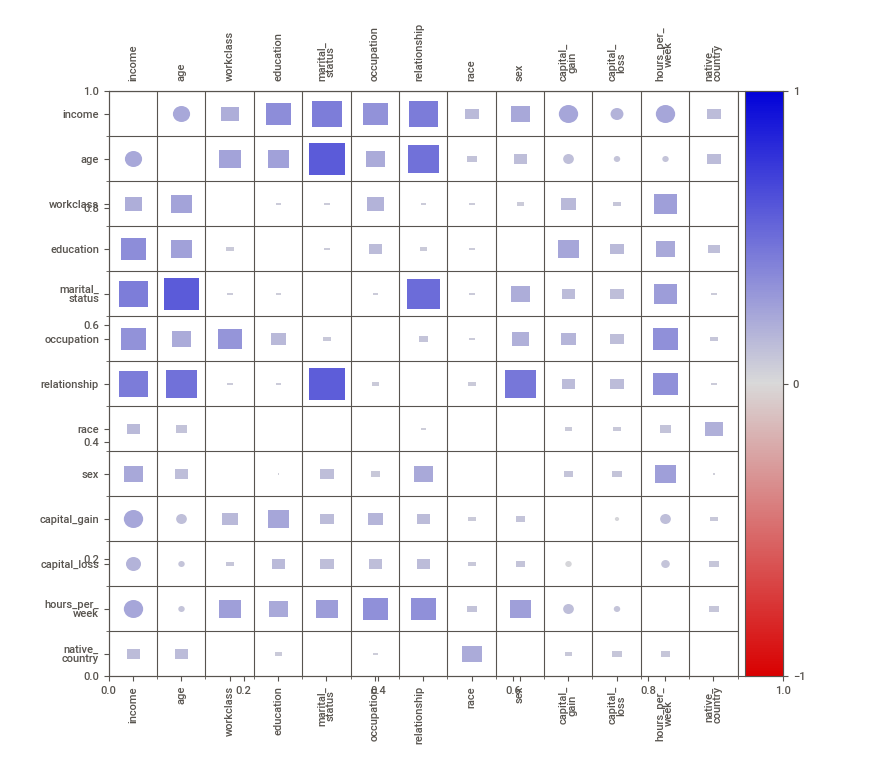
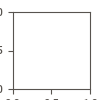

In [20]:
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
feature_config = sv.FeatureConfig(force_num=["income"])

df_viz = df.copy()
le = LabelEncoder()
df_viz['income'] = le.fit_transform(df_viz['income'])

sweet_report = sv.analyze(df_viz, 'income', feat_cfg=feature_config)
sweet_report.show_notebook()

## Comparaison

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



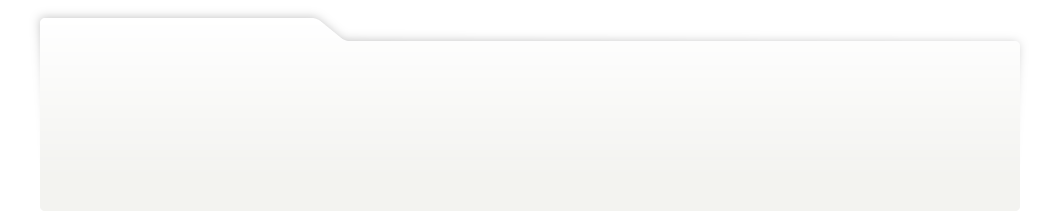
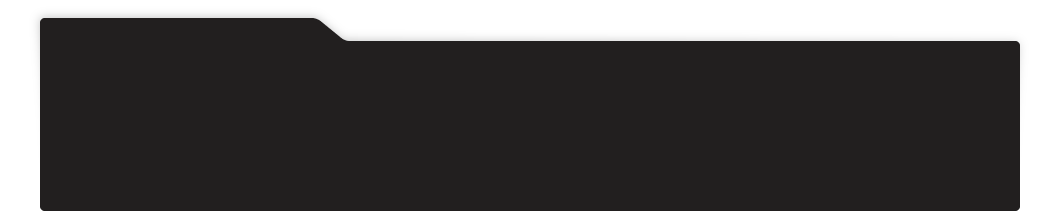
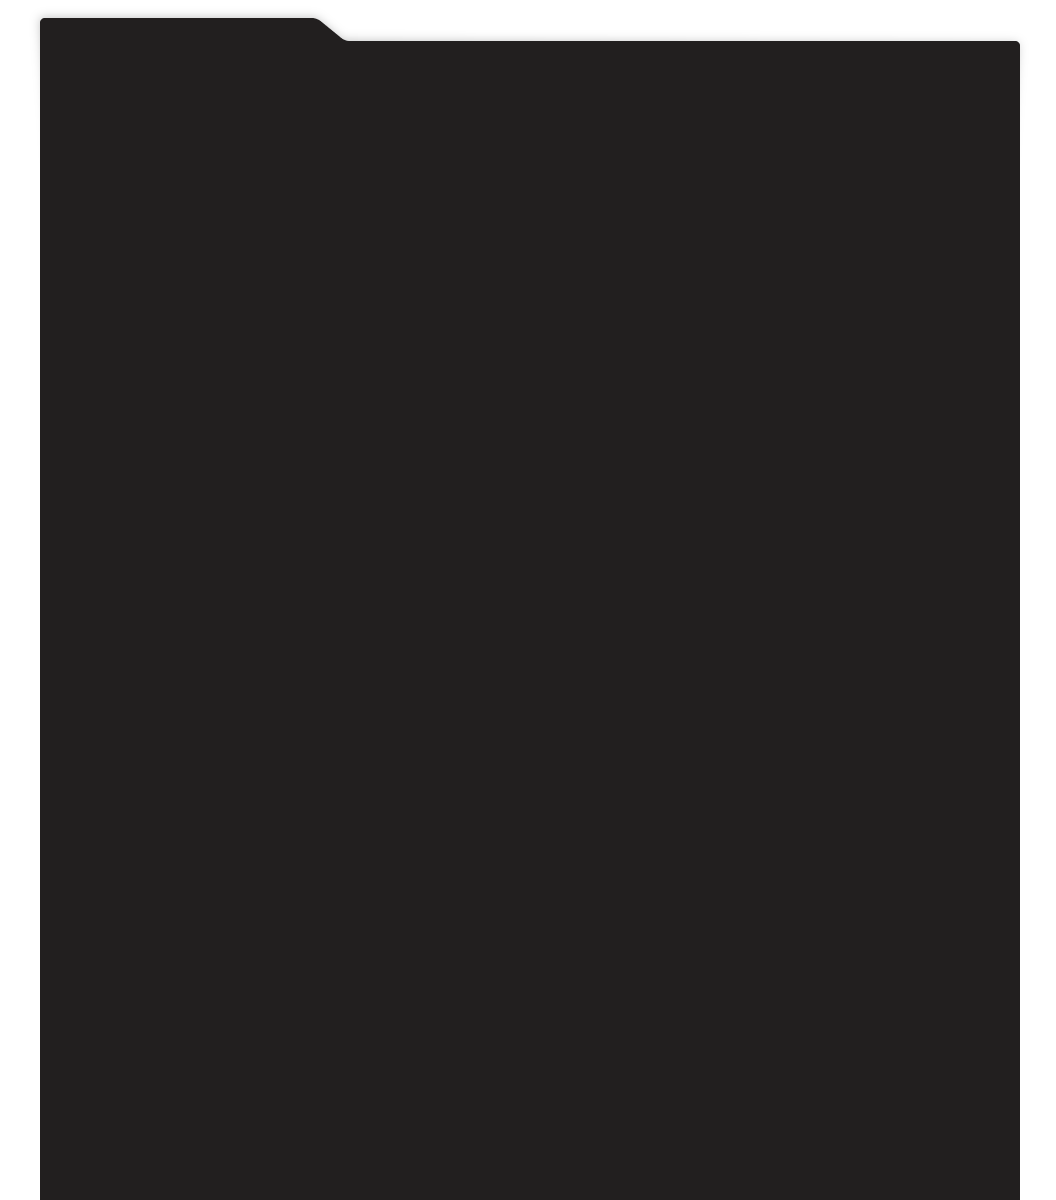
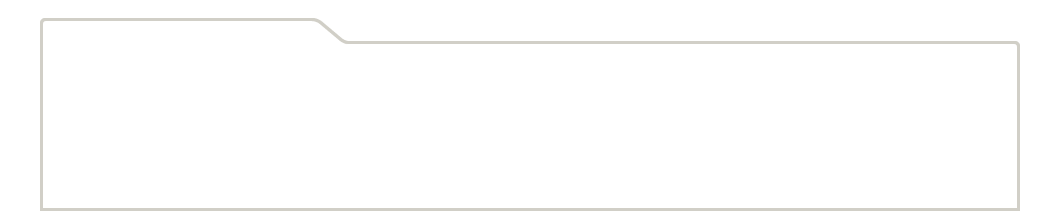
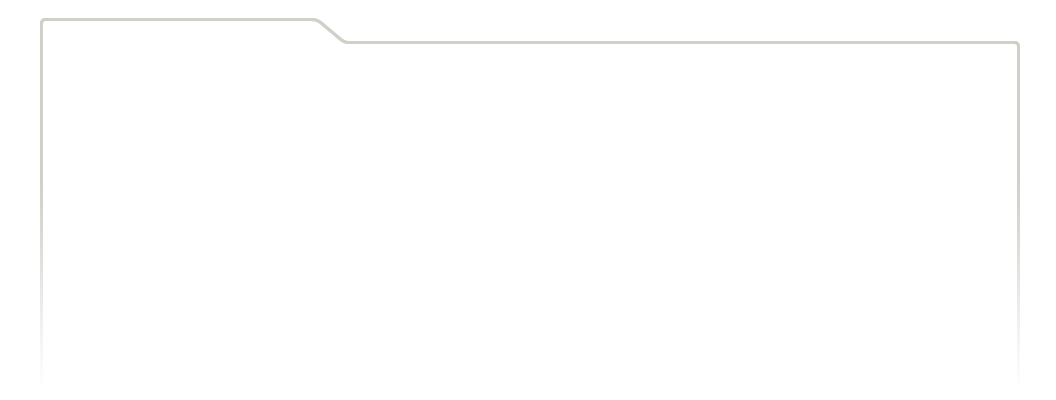
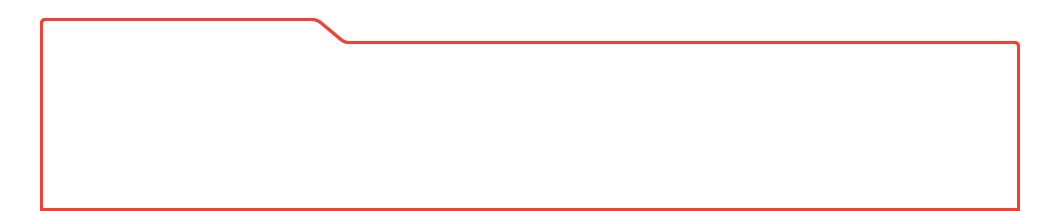
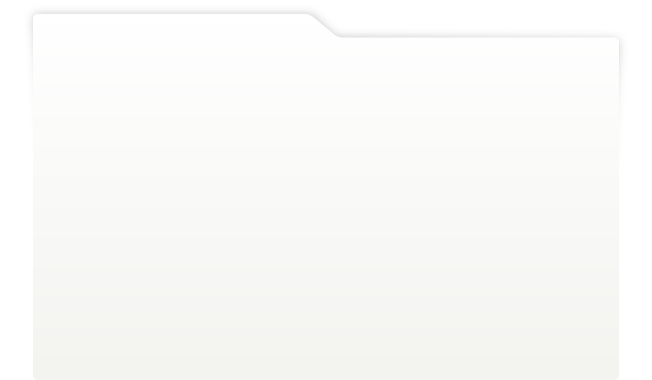
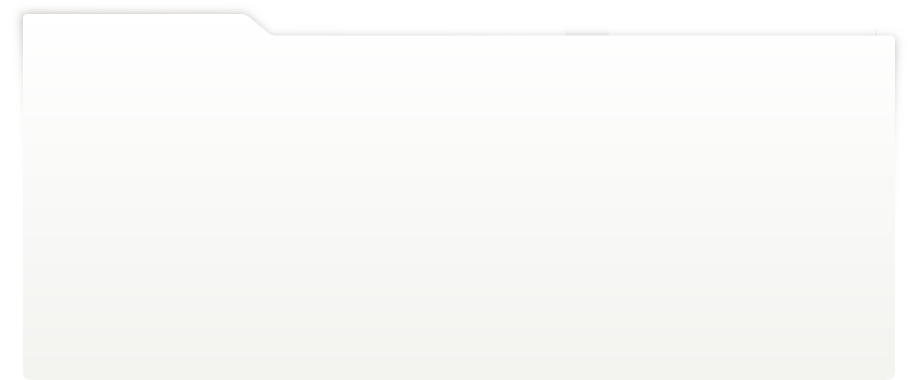
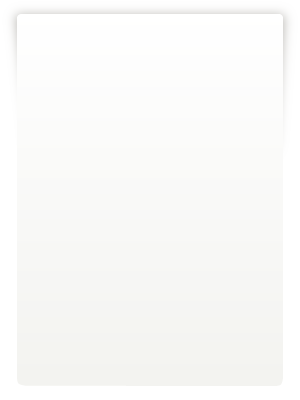
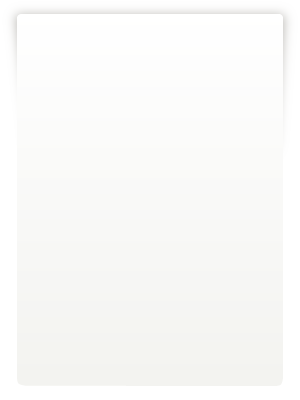
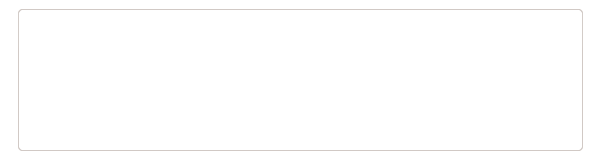
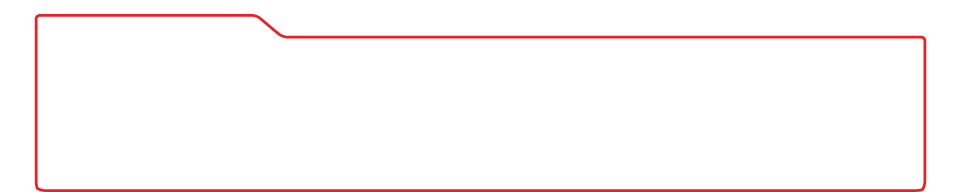
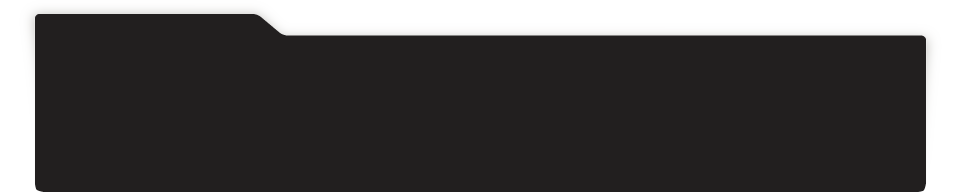
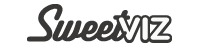
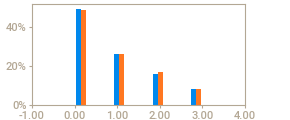
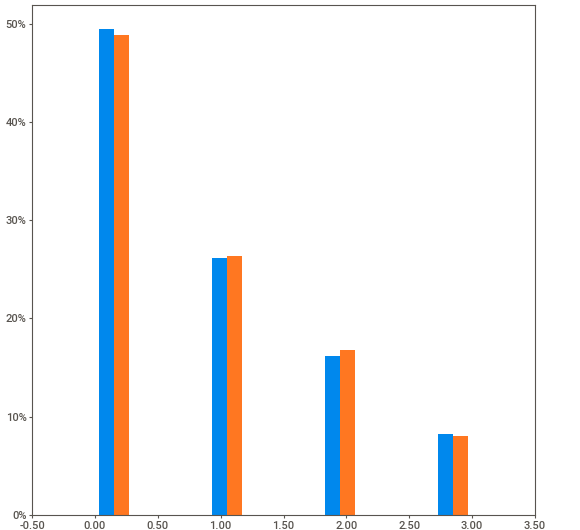
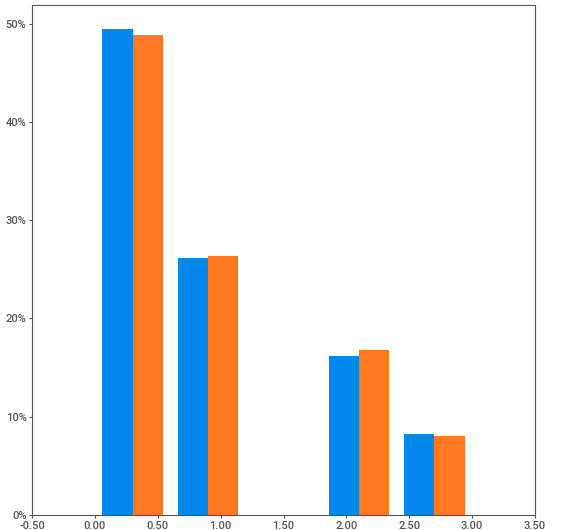
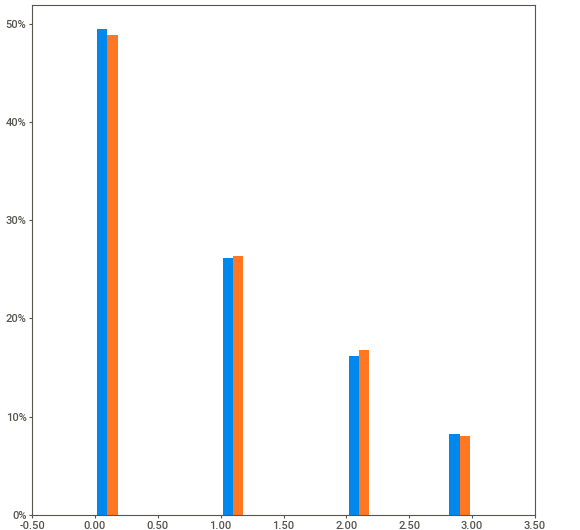
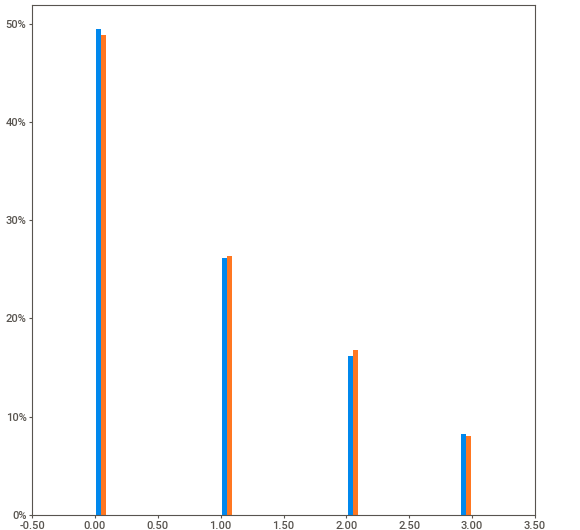
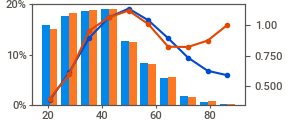
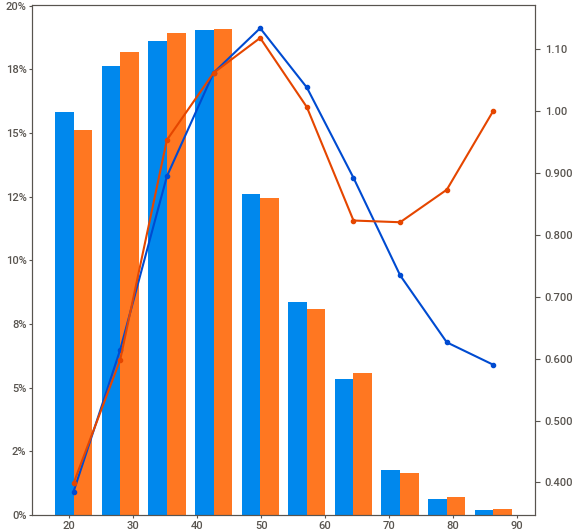
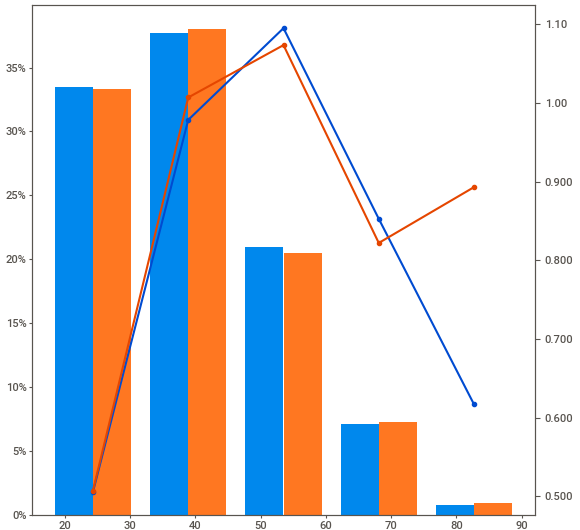
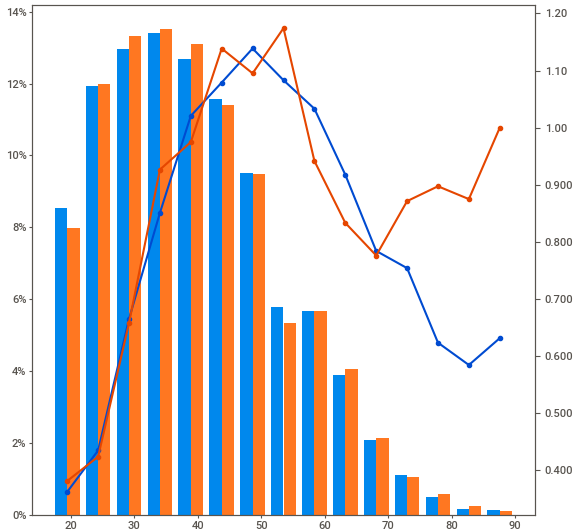
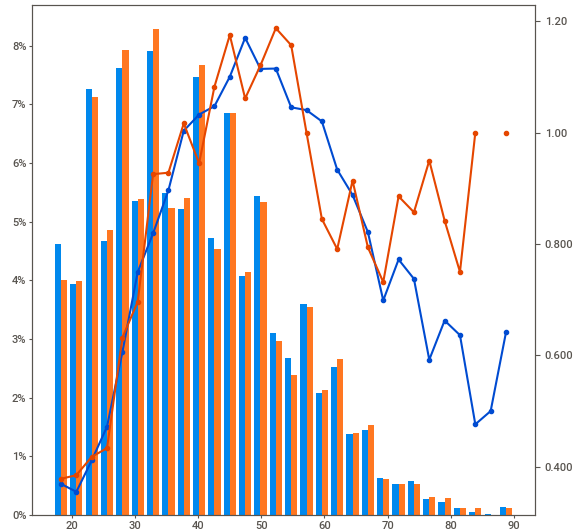
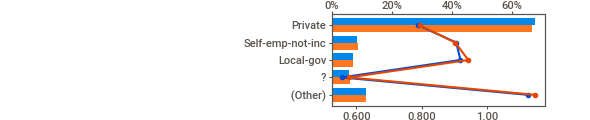
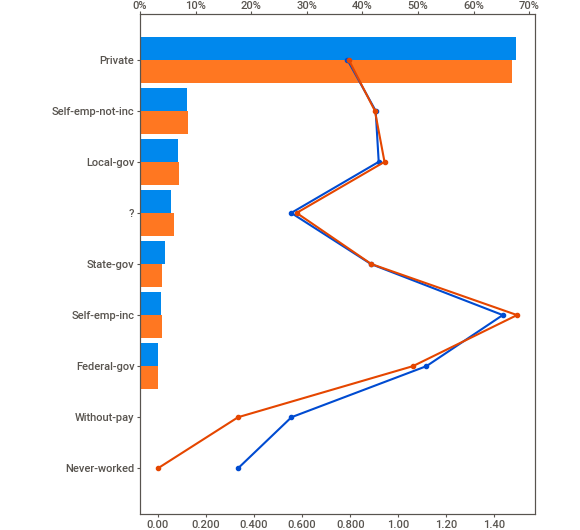
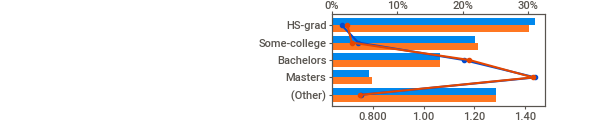
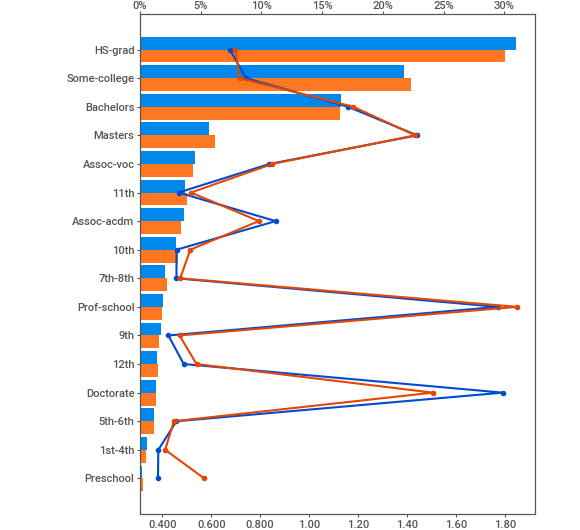
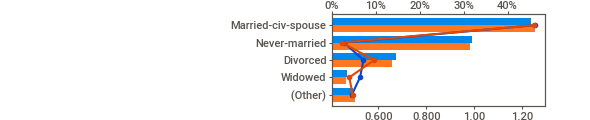
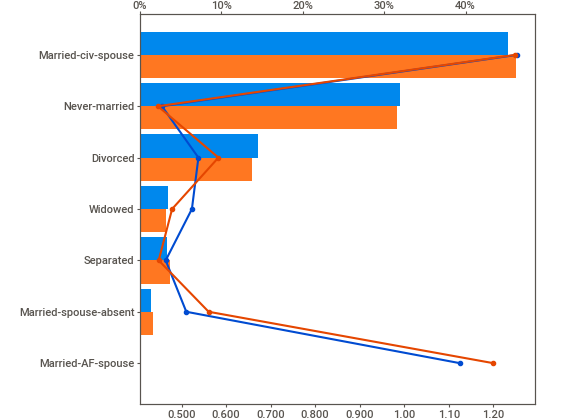
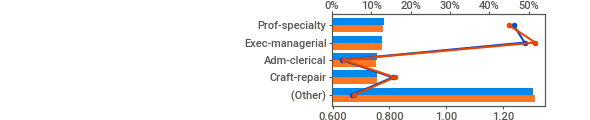
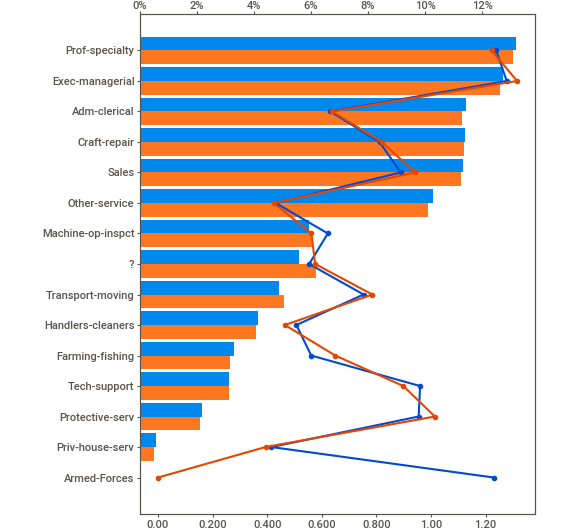
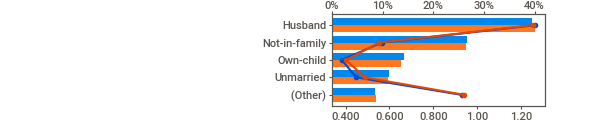
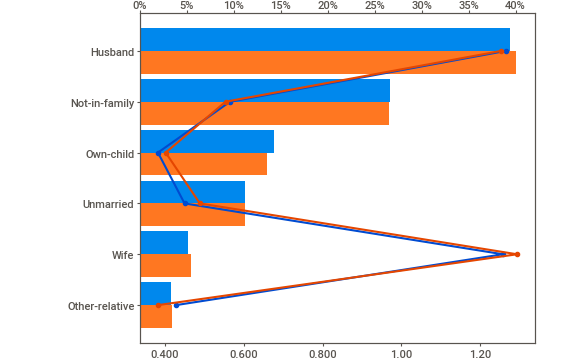
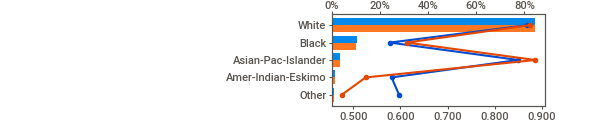
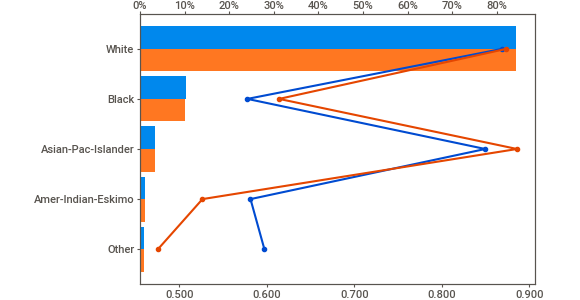
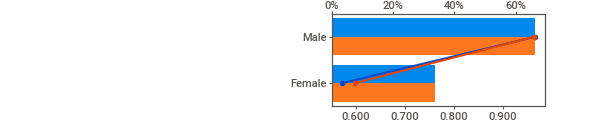
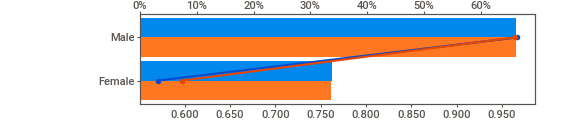
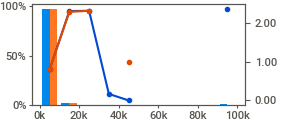
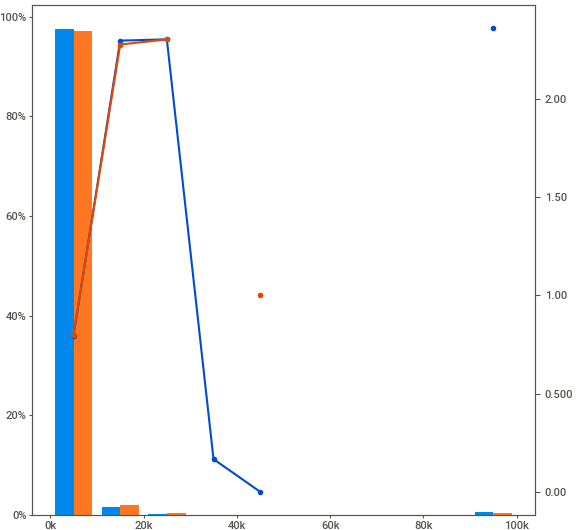
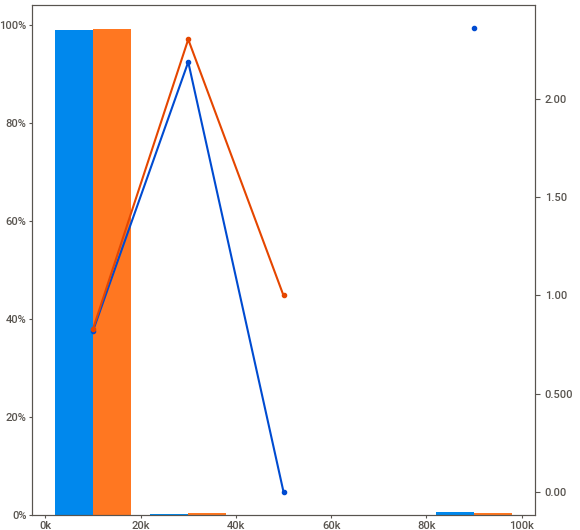
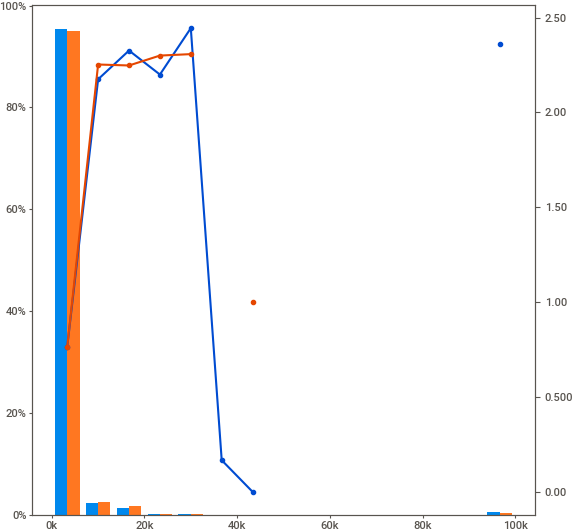
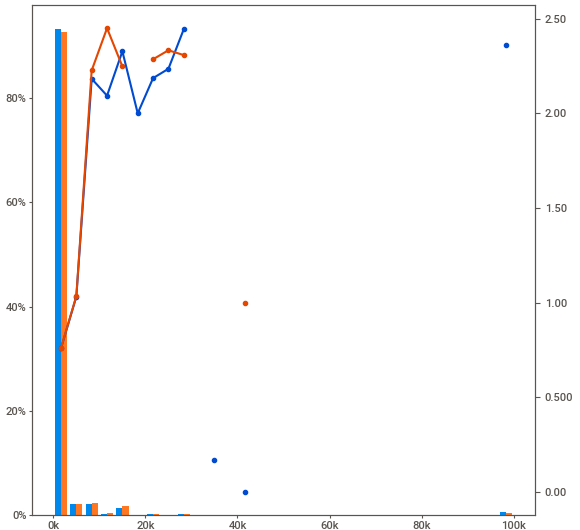
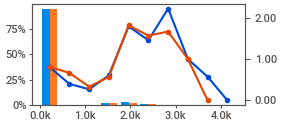
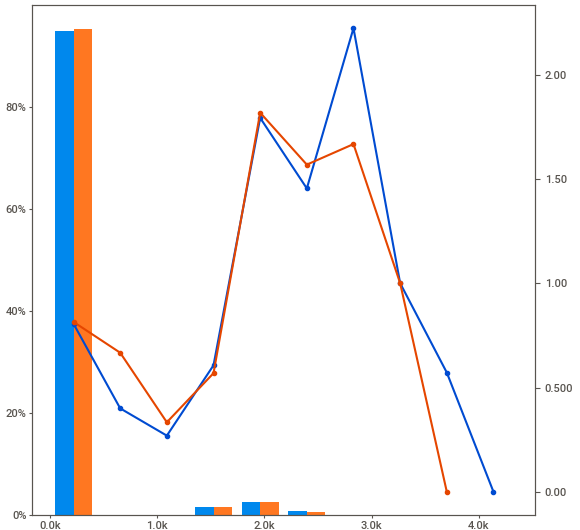
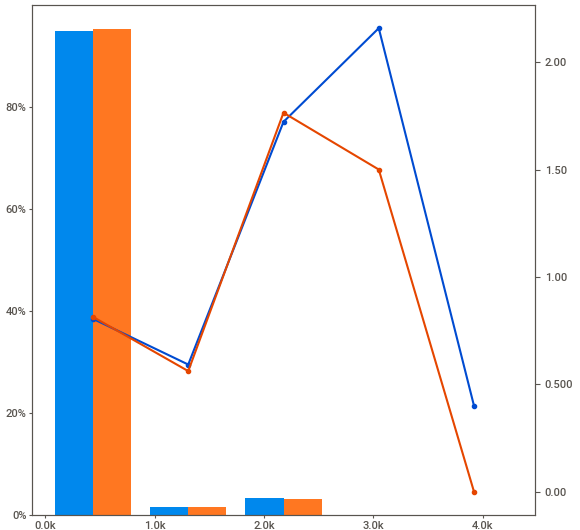
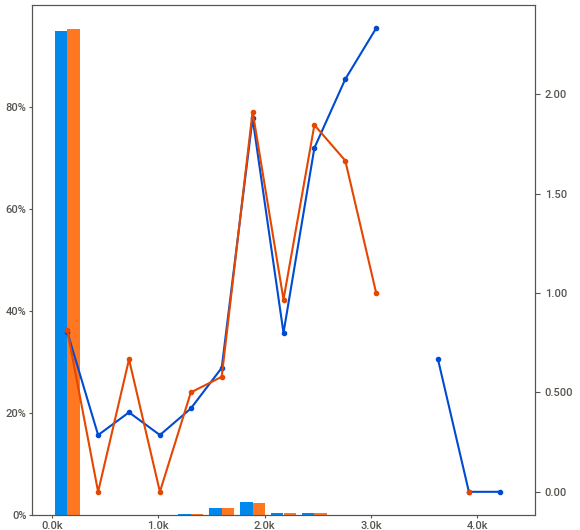
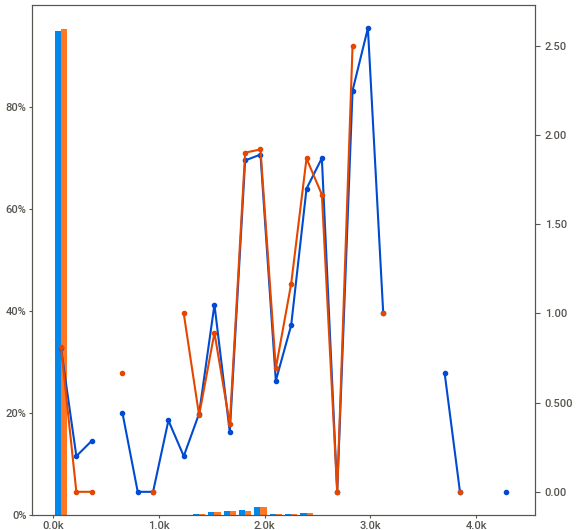
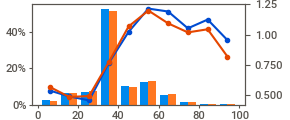
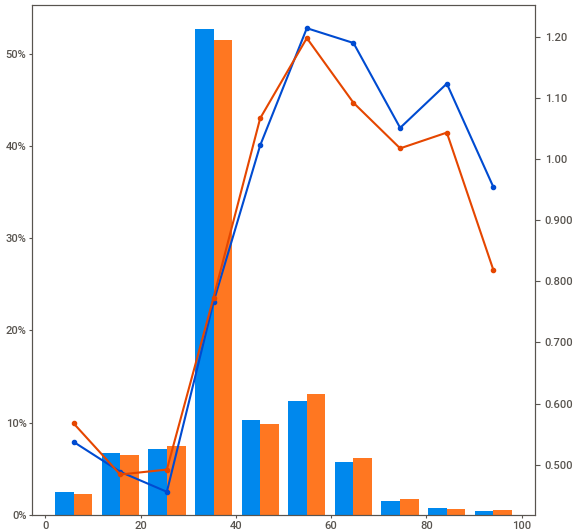
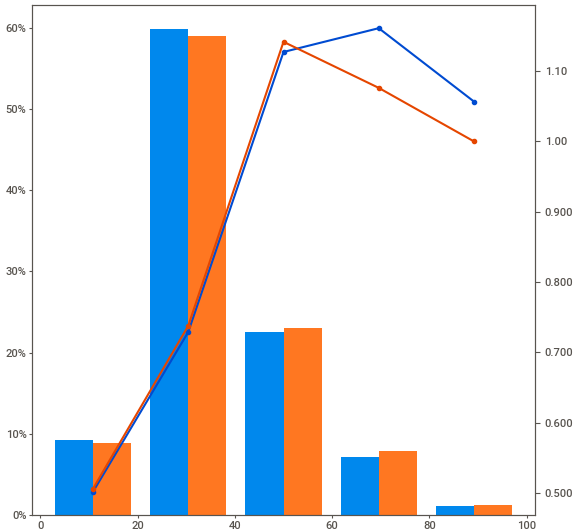
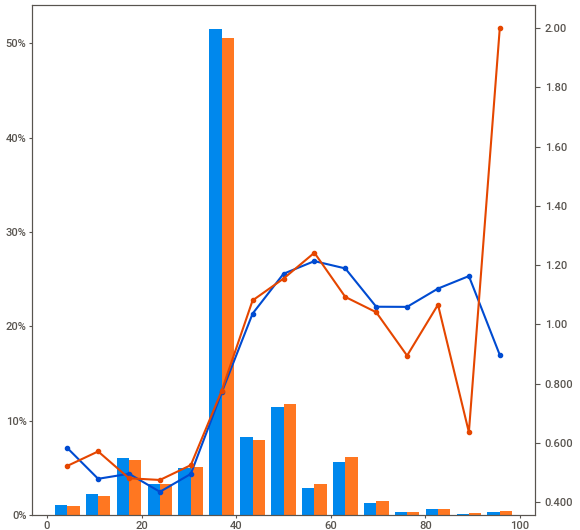
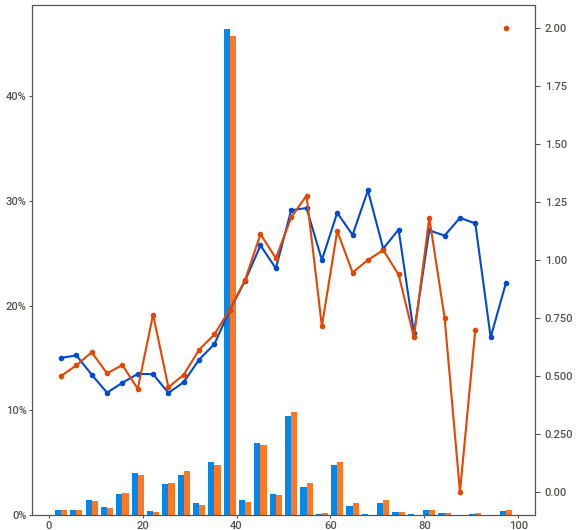
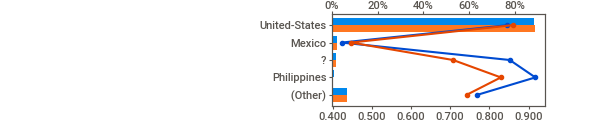
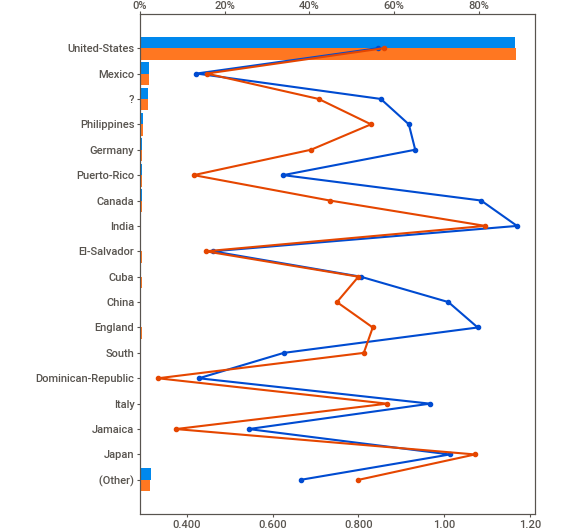
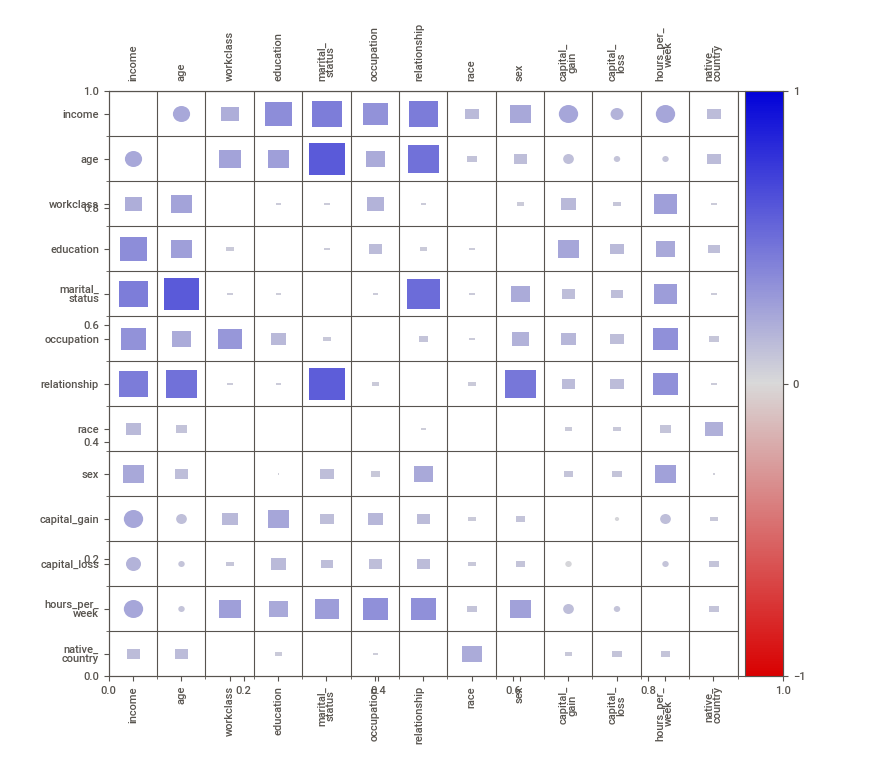
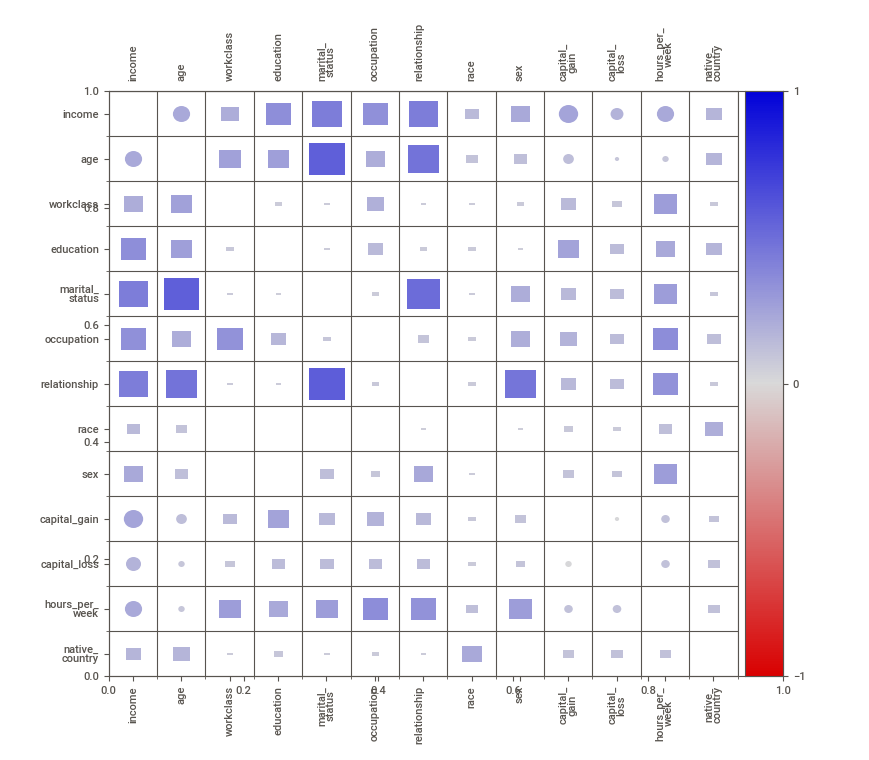

In [21]:
X_train, X_test = train_test_split(df_viz, random_state=42, train_size=.85, shuffle=True)
sweet_report = sv.compare([X_train, 'train'], [X_test, 'test'], 'income', feat_cfg=feature_config)
sweet_report.show_notebook()

# Modélisation

## Split

In [22]:
X = df.copy()
X.drop(['income'], axis=1, inplace=True)
y = df['income'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=.85, shuffle=True)

## Encodage
### Income (target)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test  = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

### Education

In [24]:
from sklearn.preprocessing import OrdinalEncoder

df.education.value_counts()
# Créer un tableau de données contenant les niveaux d'éducation
data = [[
    "Preschool",
    "1st-4th grade",
    "5th-6th grade",
    "7th-8th grade",
    "9th grade",
    "10th grade",
    "11th grade",
    "12th grade",
    "Assoc-voc",
    "Assoc-acdm",
    "Some-college",
    "Bachelors",
    "Masters",
    "Doctorate",
    "Prof-school"
]]

education_ordinal_encoder_column = ['education']

# Créer un ordinalencoder
education_ordinal_encoder = OrdinalEncoder(categories=data, handle_unknown='use_encoded_value', unknown_value=-1)

### OHE

In [25]:
from sklearn.preprocessing import OneHotEncoder

binary_columns = ['sex']
nominal_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

binary_encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
nominal_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### Création du pipeline

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def create_transformers(add_transformers = None):
    init_transformers = [
        ('education', education_ordinal_encoder, education_ordinal_encoder_column),
        ('binary var', binary_encoder, binary_columns),
        ('nominal var', nominal_encoder, nominal_columns),
    ]
    if add_transformers is not None:
        init_transformers = init_transformers + add_transformers
            
    return ColumnTransformer(
        transformers=init_transformers,
        remainder='passthrough'
    )

pipe = make_pipeline(create_transformers(), MinMaxScaler())
display(pipe.fit(X_train, y_train))

X_transform = pipe.fit_transform(X_train, y_train)
display(X_transform.head())



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('education',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th '
                                                                              'grade',
                                                                              '5th-6th '
                                                                              'grade',
                                                                              '7th-8th '
                                                                              'grade',
                                                                              '9th '
                                                                              'grade',
                                                                              '10th '
                                                                              'grade',
                                                                              '11th '
                                                                              'grade',
                                                                              '12th '
                                                                              'grade',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Some-college',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Doctorate',
                                                                              'Prof-school']],
                                                                 handle_u...coded_value',
                                                                 unknown_value=-1),
                                                  ['education']),
                                                 ('binary var',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('nominal var',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race',
                                                   'native_country'])])),
                ('minmaxscaler', MinMaxScaler())])

education__education  binary var__sex_Male  \
30775              0.000000                   1.0   
3197               0.733333                   0.0   
21503              0.000000                   1.0   
15526              0.933333                   1.0   
3391               0.800000                   0.0   

       nominal var__workclass_Federal-gov  nominal var__workclass_Local-gov  \
30775                                 0.0                               0.0   
3197                                  0.0                               0.0   
21503                                 0.0                               0.0   
15526                                 0.0                               0.0   
3391                                  0.0                               0.0   

       nominal var__workclass_Never-worked  nominal var__workclass_Private  \
30775                                  0.0                             1.0   
3197                                   0.0                             0.0   
21503                                  0.0                             1.0   
15526                                  0.0                             0.0   
3391                                   0.0                             0.0   

       nominal var__workclass_Self-emp-inc  \
30775                                  0.0   
3197                                   0.0   
21503                                  0.0   
15526                                  0.0   
3391                                   0.0   

       nominal var__workclass_Self-emp-not-inc  \
30775                                      0.0   
3197                                       0.0   
21503                                      0.0   
15526                                      1.0   
3391                                       0.0   

       nominal var__workclass_State-gov  nominal var__workclass_Without-pay  \
30775                               0.0                                 0.0   
3197                                0.0                                 0.0   
21503                               0.0                                 0.0   
15526                               0.0                                 0.0   
3391                                0.0                                 0.0   

       ...  nominal var__native_country_Taiwan  \
30775  ...                                 0.0   
3197   ...                                 0.0   
21503  ...                                 0.0   
15526  ...                                 0.0   
3391   ...                                 0.0   

       nominal var__native_country_Thailand  \
30775                                   0.0   
3197                                    0.0   
21503                                   0.0   
15526                                   0.0   
3391                                    0.0   

       nominal var__native_country_Trinadad&Tobago  \
30775                                          0.0   
3197                                           0.0   
21503                                          0.0   
15526                                          0.0   
3391                                           0.0   

       nominal var__native_country_United-States  \
30775                                        1.0   
3197                                         0.0   
21503                                        1.0   
15526                                        1.0   
3391                                         1.0   

       nominal var__native_country_Vietnam  \
30775                                  0.0   
3197                                   0.0   
21503                                  0.0   
15526                                  0.0   
3391                                   0.0   

       nominal var__native_country_Yugoslavia  remainder__age  \
30775                                     0.0        0.684932   
3197                                      0.0        0.000000 

### VarianceTreshold
On regarde dans un premier temps les variances des colonnes

Moyenne des variances: 0.03888612327782125


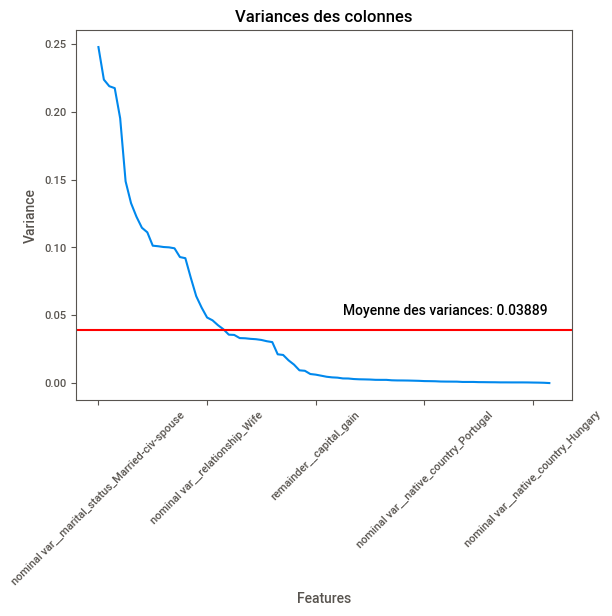

In [27]:
from matplotlib import pyplot as plt

var = X_transform.var(axis=0)
var = var.sort_values(ascending=False)
print('Moyenne des variances:', var.mean())

ax = var.plot()
ax.axhline(y= var.mean(), color='red')
ax.text(45, 0.05, f'Moyenne des variances: {round(var.mean(), 5)}')
plt.title('Variances des colonnes')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()

#### On détermine notre seuil de variance

count    84.000000
mean      0.038886
std       0.059944
min       0.000027
25%       0.001305
50%       0.005067
75%       0.046800
max       0.247779
dtype: float64


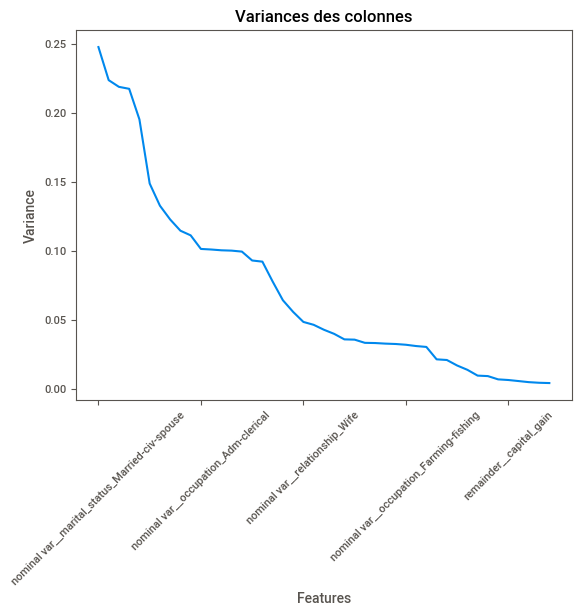

In [28]:
variance_treshold = 0.004

print(var.describe())

ax = var[var > variance_treshold].plot()
plt.title('Variances des colonnes')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold= variance_treshold)
selector.fit_transform(X_transform)
X_cols_retained = np.array(np.asarray(list(X_transform)))[selector.get_support()]
print('Colonnes restantes: ', len(X_cols_retained))

Colonnes restantes:  45


### Affichage du pipeline

In [30]:
pipe = make_pipeline(
            create_transformers(),
            VarianceThreshold(threshold= variance_treshold),
            StandardScaler())
display(pipe)
X_transform = pipe.fit_transform(X_train, y_train)
display(X_transform.head())

#pipe.get_params()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('education',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              '1st-4th '
                                                                              'grade',
                                                                              '5th-6th '
                                                                              'grade',
                                                                              '7th-8th '
                                                                              'grade',
                                                                              '9th '
                                                                              'grade',
                                                                              '10th '
                                                                              'grade',
                                                                              '11th '
                                                                              'grade',
                                                                              '12th '
                                                                              'grade',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Some-college',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Doctorate',
                                                                              'Prof-school']],
                                                                 handle_u...
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('nominal var',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race',
                                                   'native_country'])])),
                ('variancethreshold', VarianceThreshold(threshold=0.004)),
                ('standardscaler', StandardScaler())])

education__education  binary var__sex_Male  \
30775             -1.097424              0.714590   
3197               0.803787             -1.399405   
21503             -1.097424              0.714590   
15526              1.322299              0.714590   
3391               0.976624             -1.399405   

       nominal var__workclass_Federal-gov  nominal var__workclass_Local-gov  \
30775                           -0.181473                          -0.27188   
3197                            -0.181473                          -0.27188   
21503                           -0.181473                          -0.27188   
15526                           -0.181473                          -0.27188   
3391                            -0.181473                          -0.27188   

       nominal var__workclass_Private  nominal var__workclass_Self-emp-inc  \
30775                        0.691758                            -0.196238   
3197                        -1.445593                            -0.196238   
21503                        0.691758                            -0.196238   
15526                       -1.445593                            -0.196238   
3391                        -1.445593                            -0.196238   

       nominal var__workclass_Self-emp-not-inc  \
30775                                -0.304550   
3197                                 -0.304550   
21503                                -0.304550   
15526                                 3.283529   
3391                                 -0.304550   

       nominal var__workclass_State-gov  \
30775                         -0.216298   
3197                          -0.216298   
21503                         -0.216298   
15526                         -0.216298   
3391                          -0.216298   

       nominal var__marital_status_Married-civ-spouse  \
30775                                        1.099310   
3197                                        -0.909662   
21503                                        1.099310   
15526                                        1.099310   
3391                                        -0.909662   

       nominal var__marital_status_Married-spouse-absent  ...  \
30775                                          -0.118376  ...   
3197                                           -0.118376  ...   
21503                                          -0.118376  ...   
15526                                          -0.118376  ...   
3391                                           -0.118376  ...   

       nominal var__native_country_Canada  \
30775                           -0.063624   
3197                            -0.063624   
21503                           -0.063624   
15526                           -0.063624   
3391                            -0.063624   

       nominal var__native_country_Germany  \
30775                             -0.06868   
3197                              -0.06868   
21503                             -0.06868   
15526                             -0.06868   
3391                              -0.06868   

       nominal var__native_country_Mexico  \
30775                           -0.147146   
3197                            -0.147146   
21503                           -0.147146   
15526                           -0.147146   
3391                            -0.147146   

       nominal var__native_country_Philippines  \
30775                                -0.082358   
3197                                 12.142040   
21503                                -0.082358   
15526                                -0.082358   
3391                                 -0.082358   

       nominal var__native_country_Puerto-Rico  \
30775                                -0.065284   
3197                                 -0.065284   
21503                                -0.065284   
15526                                -0.065284   
3391                                 -0.065284   

       nominal var__native_co

### GridSearchCV

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
import warnings
warnings.simplefilter(action='ignore', category=Warning)


pipe = make_pipeline(
            create_transformers(),
            VarianceThreshold(threshold= variance_treshold),
            StandardScaler(),
            RandomForestClassifier())

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.68      0.61      3250
           1       0.26      0.17      0.20      1753
           2       0.44      0.46      0.45      1115
           3       0.15      0.10      0.12       536

    accuracy                           0.46      6654
   macro avg       0.35      0.35      0.35      6654
weighted avg       0.42      0.46      0.44      6654



              precision    recall  f1-score   support

           0       0.55      0.68      0.61      3250
           1       0.25      0.17      0.20      1753
           2       0.45      0.47      0.46      1115
           3       0.15      0.10      0.12       536

    accuracy                           0.46      6654
   macro avg       0.35      0.35      0.35      6654
weighted avg       0.42      0.46      0.44      6654



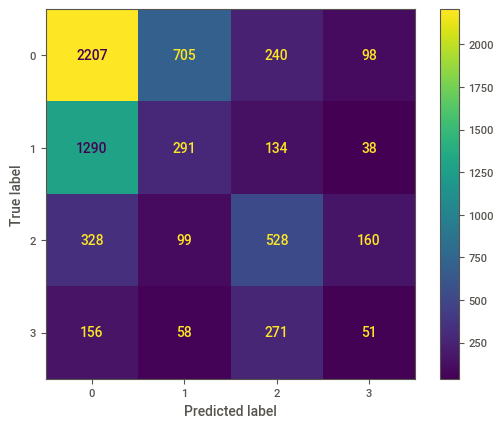

In [15]:
parameters = {
    'variancethreshold__threshold': np.linspace(0, 0.045, 20),
    #'standardscaler': [StandardScaler(), MinMaxScaler(), Normalizer()]
}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5).fit(X_train, y_train)

pipe.fit(X_train, y_train)

# Access the best set of parameters
best_params = grid.best_params_
print('BEST PARAMS ::', best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
#print('BEST PIPE ::', best_pipe)

y_pred = best_pipe.predict(X_test)

print(classification_report(y_test, y_pred))

# result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid.classes_)
disp.plot()
plt.show()

In [148]:
pipe = make_pipeline(
            create_transformers(),
            VarianceThreshold(threshold= best_params['variancethreshold__threshold']),
            StandardScaler())
X_transform = pipe.fit_transform(X_train, y_train)

feat = best_pipe['randomforestclassifier'].feature_importances_

f = pd.DataFrame({'features': np.array(list(X_transform)), 'score': feat})
f.sort_values(by=['score'], ascending=False, inplace=True)
f

features     score
35                                     remainder__age  0.327331
38                          remainder__hours_per_week  0.170544
0                                education__education  0.086147
36                            remainder__capital_gain  0.062205
8      nominal var__marital_status_Married-civ-spouse  0.031367
37                            remainder__capital_loss  0.028594
1                                binary var__sex_Male  0.019146
4                      nominal var__workclass_Private  0.018253
10          nominal var__marital_status_Never-married  0.017589
34          nominal var__native_country_United-States  0.017464
32                            nominal var__race_White  0.013752
15            nominal var__occupation_Exec-managerial  0.011301
20             nominal var__occupation_Prof-specialty  0.010804
22                      nominal var__occupation_Sales  0.010703
6             nominal var__workclass_Self-emp-not-inc  0.010429
13               nominal var__occupation_Adm-clerical  0.010215
14               nominal var__occupation_Craft-repair  0.010153
25            nominal var__relationship_Not-in-family  0.010010
31                            nominal var__race_Black  0.009811
3                    nominal var__workclass_Local-gov  0.009342
19              nominal var__occupation_Other-service  0.008944
7                    nominal var__workclass_State-gov  0.007985
27                nominal var__relationship_Own-child  0.007953
18          nominal var__occupation_Machine-op-inspct  0.007465
24           nominal var__occupation_Transport-moving  0.006785
28                nominal var__relationship_Unmarried  0.006768
23               nominal var__occupation_Tech-support  0.006392
5                 nominal var__workclass_Self-emp-inc  0.006360
2                  nominal var__workclass_Federal-gov  0.006337
17          nominal var__occupation_Handlers-cleaners  0.005889
30               nominal var__race_Asian-Pac-Islander  0.005814
11              nominal var__marital_status_Separated  0.005694
29                     nominal var__relationship_Wife  0.005452
16            nominal var__occupation_Farming-fishing  0.005421
26           nominal var__relationship_Other-relative  0.005088
12                nominal var__marital_status_Widowed  0.004582
21            nominal var__occupation_Protective-serv  0.004581
33                 nominal var__native_country_Mexico  0.003877
9   nominal var__marital_status_Married-spouse-absent  0.003455